In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from planet import *
from fastai.conv_learner import *

## below is just utils skip it when you are running it

In [3]:
class1000 = pd.read_csv('~/data/1000_classes.csv')

In [4]:
print(class1000.head())
len(class1000)

   Unnamed: 0    classes
0           0  /m/01g317
1           1   /m/09j2d
2           2   /m/04yx4
3           3   /m/0dzct
4           4   /m/07j7r


1000

In [5]:
training1000 = pd.read_csv('/home/hongpengfei_emrys/data/training_1000.csv')

In [6]:
training1000.head()

,ImageID,labels
0,89aa80ac0e442736,/m/06_dn /m/01mzpv /m/0c_jw
1,e97989f6a0a85ded,/m/01bgsw /m/01g317 /m/083wq /m/09j2d /m/09j5n
2,10b33654f71c66ec,/m/019nj4 /m/01g317 /m/05r655 /m/09j2d /m/09j5n
3,8aaa439eb2f9eebf,/m/03hl4l9 /m/03xxp /m/0d8zb /m/0jbk
4,2cfc6c3014f1bad8,/m/0j7ty /m/05s2s /m/0c9ph5


In [7]:
path = Path('/home/hongpengfei_emrys/data/256/')

In [8]:
# clear data that is not in the training image folder
image_names = os.listdir(path)
image_names = [o.split('.')[0] for o in image_names]
print(len(image_names))
print(len(training1000))
imageID = list(training1000.ImageID)
print(imageID[0])
print(len(imageID))

87412
103813
89aa80ac0e442736
103813


In [9]:
count=0
error=0
for ID in imageID:
    if ID not in image_names:
        try:
            count+=1
            training1000.drop(imageID.index(ID), inplace=True)
        except Exception as e:
            error+=1

In [11]:
count, error

(16401, 0)

In [12]:
len(training1000)

87412

In [17]:
# rize image to 256
for n in image_names:
    img = Image.open(path/str(n+'.jpg'))
    if img.size != (256, 256):
        count += 1
        img = img.resize((256,256), Image.ANTIALIAS)
        img.save(path/str(n+'.jpg'))

In [19]:
training1000.head()

,ImageID,labels
1,e97989f6a0a85ded,/m/01bgsw /m/01g317 /m/083wq /m/09j2d /m/09j5n
2,10b33654f71c66ec,/m/019nj4 /m/01g317 /m/05r655 /m/09j2d /m/09j5n
3,8aaa439eb2f9eebf,/m/03hl4l9 /m/03xxp /m/0d8zb /m/0jbk
4,2cfc6c3014f1bad8,/m/0j7ty /m/05s2s /m/0c9ph5
6,ffd6c3e8c0839eff,/m/02c66t /m/0ltfs /m/01d40f /m/01g317 /m/03bt...


In [16]:
# write back
training1000.to_csv('/home/hongpengfei_emrys/data/training_1000_filtered.csv', index=False)

## the end of utils

## load data

In [3]:
PATH = Path('/home/hongpengfei_emrys/data/')

In [4]:
train1000 = pd.read_csv('/home/hongpengfei_emrys/data/training_1000_filtered.csv')

In [5]:
metricss = [f2]
f_model = resnext101

In [6]:
label_csv = PATH/'training_1000_filtered.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [7]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, '256', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='test_256', bs=32)

In [ ]:
def get_data(sz, bs): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                       val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/13
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/37
    return data if sz > 300 else data.resize(340, 'tmp') # Reading the jpgs and resizing is slow for big images, so resizing them all to 340 first saves time

In [8]:
data = get_data(256)

In [9]:
x,y = next(iter(data.val_dl))

In [10]:
data.classes[0], len(data.classes)

('/m/0118ms9c', 1000)

In [11]:
# for the first picture
list(zip(data.classes, y[0]))

[('/m/0118ms9c', 0.0),
 ('/m/011_dp', 0.0),
 ('/m/011_f4', 0.0),
 ('/m/011_g9', 0.0),
 ('/m/011jbn', 0.0),
 ('/m/011k07', 0.0),
 ('/m/011l78', 0.0),
 ('/m/011s0', 0.0),
 ('/m/0120dh', 0.0),
 ('/m/01226z', 0.0),
 ('/m/01280g', 0.0),
 ('/m/012c4n', 0.0),
 ('/m/012f08', 0.0),
 ('/m/012mj', 0.0),
 ('/m/012n4x', 0.0),
 ('/m/012n7d', 0.0),
 ('/m/012sbd', 0.0),
 ('/m/012v4j', 0.0),
 ('/m/012w5l', 0.0),
 ('/m/012yh1', 0.0),
 ('/m/0130jx', 0.0),
 ('/m/01350r', 0.0),
 ('/m/0138tl', 0.0),
 ('/m/013_1c', 0.0),
 ('/m/013s93', 0.0),
 ('/m/013xlm', 0.0),
 ('/m/013y0j', 0.0),
 ('/m/013y1f', 0.0),
 ('/m/01443y', 0.0),
 ('/m/01445t', 0.0),
 ('/m/0149r', 0.0),
 ('/m/014dsx', 0.0),
 ('/m/014j1m', 0.0),
 ('/m/014sv8', 0.0),
 ('/m/014trl', 0.0),
 ('/m/014y4n', 0.0),
 ('/m/01515d', 0.0),
 ('/m/0152hh', 0.0),
 ('/m/01599', 0.0),
 ('/m/015_x', 0.0),
 ('/m/015c4z', 0.0),
 ('/m/015h_t', 0.0),
 ('/m/015lz1', 0.0),
 ('/m/015p6', 0.0),
 ('/m/015qff', 0.0),
 ('/m/015x4r', 0.0),
 ('/m/015y8h', 0.0),
 ('/m/0167gd', 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


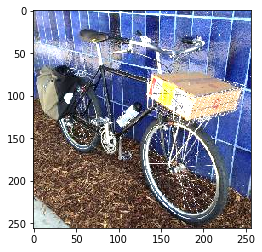

In [12]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4)

In [13]:
learn = ConvLearner.pretrained(f_model, data, metrics=metricss, )

epoch      trn_loss   val_loss   f2                             
    0      0.027581   0.021944   0.293998  



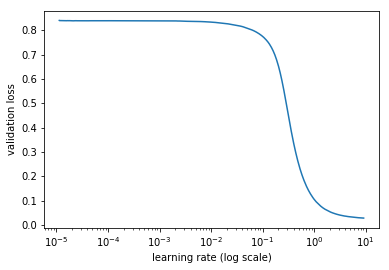

In [32]:
lrf = learn.lr_find()
learn.sched.plot()

In [14]:
lr = 1
learn.fit(lr, 5, cycle_len=1, cycle_mult=1)

epoch      trn_loss   val_loss   f2                             
    0      0.025706   0.023867   0.247584  
    1      0.023972   0.021451   0.30066                        
 57%|█████▋    | 620/1093 [13:02<09:45,  1.24s/it, loss=0.0218]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    4      0.019087   0.016799   0.403189                       



[array([0.0168]), 0.40318937063955335]

In [20]:
# the following cell is runned two times
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                             
    0      0.016919   0.014711   0.493713  
    1      0.015879   0.014342   0.512769                       
    2      0.01625    0.014217   0.518531                       



[array([0.01422]), 0.5185312969190187]

In [23]:
# the following cell is runned 1 time.
learn.fit(lr/2, 2, cycle_len=1, cycle_mult=1)

epoch      trn_loss   val_loss   f2                             
    0      0.015971   0.01414    0.524244  
    1      0.016035   0.014044   0.529674                       



[array([0.01404]), 0.5296741980748115]

In [15]:
learn.unfreeze()
lrs = np.array([0.005, 0.05, 0.5])

In [16]:
learn.fit(lrs, 1, cycle_len=1, cycle_mult=1)

epoch      trn_loss   val_loss   f2                               
    0      0.015266   0.013409   0.572791  



[array([0.01341]), 0.5727912780212229]

## dont mess up with previous training models unless you are confident

In [17]:
learn.save('model_resnext101_1000_256_87000')

In [14]:
learn.load('model_resnext101_1000_256_87000')

In [17]:
learn.save('model_resnext101_1000_256_87000_all')

In [18]:
learn.load('model_resnext101_1000_256_87000_all')

In [27]:
# learn.unfreeze()
# learn.fit(lr/2, 1, cycle_len=1)

epoch      trn_loss   val_loss   f2                          
    0      0.155299   0.136965   0.704523  


[array([0.13697]), 0.7045227368127911]

In [19]:
multi_preds, y = learn.TTA(is_test=True)
preds = np.mean(multi_preds, 0)

In [20]:
len(preds)

32536

In [21]:
test_fnames = read_dir(PATH, 'test_256')

In [22]:
preds_filter = np.round(preds)

In [23]:
def extract_id (name):
    output = name.split("/")[-1].split(".")[0]
    return output

In [24]:
submit = {}
for i, pred in enumerate(preds_filter):
    id_ = extract_id(test_fnames[i])
    label = ""
    for num, j in enumerate(pred):
        if j == 1:
            label += data.classes[num]
            label += " "
    label = label[:-1]
    submit[id_] = label

In [25]:
len(submit.keys())

32536

In [26]:
training = pd.DataFrame.from_dict(submit,orient='index')
training.index.names = ['image_id']
training.columns = ['labels']
training.to_csv("test_1.csv")